In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Generate Binary Data

In [2]:
np.random.seed(42)
X = np.random.randint(0, 2, (30, 5))  # 30 samples, 5 binary features

In [3]:
def jaccard_distance(a, b):
    intersection = np.sum(np.logical_and(a, b))
    union = np.sum(np.logical_or(a, b))
    if union == 0:
        return 0  # Avoid division by zero
    return 1 - (intersection / union)

In [4]:
k = 3
centroids = X[np.random.choice(range(len(X)), k, replace=False)]
max_iters = 100

In [5]:
for _ in range(max_iters):
    labels = []
    for point in X:
        distances = [jaccard_distance(point, centroid) for centroid in centroids]
        labels.append(np.argmin(distances))
    labels = np.array(labels)

    # Update centroids by majority vote
    new_centroids = []
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            majority_vote = (np.sum(cluster_points, axis=0) >= (len(cluster_points)/2)).astype(int)
            new_centroids.append(majority_vote)
        else:
            new_centroids.append(centroids[i])
    new_centroids = np.array(new_centroids)

    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

### Reduce to 2D plotting

In [6]:
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

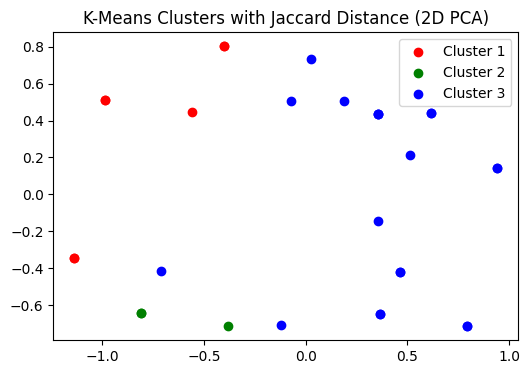

Final Centroids (Binary):
[[0 1 0 0 0]
 [0 0 0 0 1]
 [1 1 1 1 1]]


In [7]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(6,4))
for i in range(k):
    plt.scatter(X_2D[labels == i, 0], X_2D[labels == i, 1], color=colors[i], label=f'Cluster {i+1}')
plt.title("K-Means Clusters with Jaccard Distance (2D PCA)")
plt.legend()
plt.show()

print("Final Centroids (Binary):")
print(centroids)